<a href="https://colab.research.google.com/github/raiaankur1/Work-with-tensorflow/blob/master/starting_basic_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:
sentences = [
    'I love my dog',
    'I love my cat'
]
sentences2 = ['I love my dog',
              'i love my cat',
              'you love my dog!']
sentences3 = ['i love my dog',
              'I love my cat',
              'you love my Dog!',
              'Do you think my dog is amazing!']

In [0]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences3)
word_index= tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences3)
print(sequences)

In [0]:
test_data = [
             ' i really love my dog',
             'my dog loves my manatee']
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)


In [0]:
sentences3 = ['i love my dog',
              'I love my cat',
              'you love my Dog!',
              'Do you think my dog is amazing!']

tokenizer = Tokenizer(num_words = 100,oov_token='<OOV>')
tokenizer.fit_on_texts(sentences3)
words_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences3)

test_data = [
             ' i really love my dog!',
             'my dog loves my manatee'
]
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)
print(words_index)

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences3 = ['i love my dog',
              'I love my cat',
              'you love my Dog!',
              'Do you think my dog is amazing!']

tokenizer = Tokenizer(num_words = 100,oov_token='<OOV>')
tokenizer.fit_on_texts(sentences3)
words_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences3)
padded_seq = pad_sequences(sequences)

print(words_index)
print(sequences)
print(padded_seq)

## Let's get sarcastic

In [0]:
!wget --no-check-certificate \
        https://github.com/raiaankur1/Work-with-tensorflow/blob/master/Sarcasm_Headlines_Dataset.json?raw=true  \
      -O  /tmp/sarcasm.json

import json

In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

In [0]:
sentences=[]
labels=[]
urls=[]

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)
sequences= tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(sentences[2])
print(padded[2])
print(padded.shape)

## IMDB_reviews Dataserts
![alt text](https://)

In [31]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised=True)

In [0]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']

In [0]:
train_sentences=[]
train_labels=[]
test_sentences=[]
test_labels=[]

for s,l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())
for s,l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

when training,labels are expected to be numpy arrays
the following code serves the same purpose

In [0]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

storing the hyperparameters into labels for easy editing of their values

In [0]:
vocab_size= 10000
oov_tok="<OOV>"

max_length=120
trunc_type="post"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer= Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(train_sentences)
padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=max_length,truncating=trunc_type)


now constructing the neural network

(also watch the hyperparameter-embedding dimension)

In [12]:
embedding_dim=16

model= tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(6,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

NameError: ignored

In [0]:
model2= tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(6,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

In [0]:
model.summary()

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(padded, train_labels, epochs=10, validation_data=(test_padded,test_labels))

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(train_sentences[3])

In [0]:
reverse_word_index= dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [0]:
print(decode_review(padded[1]))
print(train_sentences[1])

In [38]:
embed=model2.layers[0]
weights= embed.get_weights()[0]
print(weights.shape)

(10000, 16)


In [0]:
import io
out_v= io.open('vecs.tesv', 'w',encoding='utf-8')
out_m= io.open('meta.tsv', 'w',encoding='utf-8')

for word_num in range(1,vocab_size):
  word= reverse_word_index[word_num]
  embeddings=weights[word_num]
  out_m.write(word +'\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

## getting back to sarcasm dataset

In [0]:
import json

!wget --no-check-certificate \
        https://github.com/raiaankur1/Work-with-tensorflow/blob/master/Sarcasm_Headlines_Dataset.json?raw=true  \
      -O  /tmp/sarcasm.json
with open('/tmp/sarcasm.json', 'r') as f:
  data=json.load(f)

In [0]:
sentences=[]
labels=[]
for item in data:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
num_words=10000
oov_tok='<OOV>'
embedding_dim=32
max_len=32
training_size=20000

In [0]:
train_sentences=sentences[:training_size]
test_sentences=sentences[training_size:]
train_labels=labels[:training_size]
test_labels=labels[training_size:]

train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences= tokenizer.texts_to_sequences(train_sentences)
test_sequences= tokenizer.texts_to_sequences(test_sentences)
padded = pad_sequences(train_sequences, padding='post', maxlen=max_len, truncating= 'post')
test_padded = pad_sequences(test_sequences, padding='post',maxlen=max_len, truncating= 'post')

In [0]:
sarcasmodel= tf.keras.Sequential([
            tf.keras.layers.Embedding(num_words, embedding_dim, input_length= max_len),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(24, activation='relu'),
            tf.keras.layers.Dense(1, activation= 'sigmoid')
])

sarcasmodel.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
sarcasmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 32)            320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = sarcasmodel.fit(padded, train_labels, epochs=30, validation_data=(test_padded, test_labels), verbose=2)

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

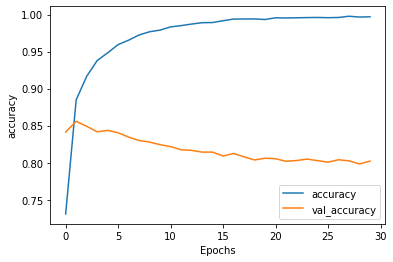

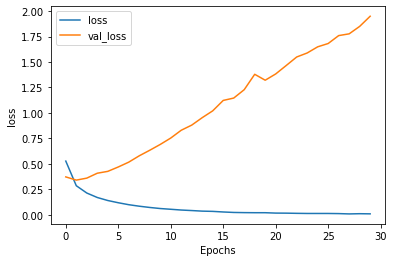

In [25]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## working of **IMDB_revies/subwords8k**

In [0]:
import tensorflow_datasets as tfds

ds = tfds.load('imdb_reviews', split='train')
for ex in ds.take(4):
  print(ex)

In [2]:
import tensorflow_datasets as tfds
imdb, info=tfds.load("imdb_reviews/subwords8k",with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZVK1IC/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZVK1IC/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZVK1IC/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
train_data,test_data= imdb['train'],imdb['test']

In [0]:
train_sentences=[]
test_sentences=[]
train_labels=[]
test_labels=[]
for s,l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())
for s,l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [0]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [0]:
max_length=120

In [0]:
tokenizer=info.features['text'].encoder

import tensorflow as tf


In [0]:
embedding_dim = 64
subwords_model = tf.keras.Sequential([
                  tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                  tf.keras.layers.GlobalAveragePooling1D(),
                  tf.keras.layers.Dense(6, activation='relu'),
                  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [28]:
subwords_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
subwords_model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10


ValueError: ignored